<a href="https://colab.research.google.com/github/Nemkac/Car-Insurance-Claim-Prediction/blob/main/CarInsuranceClaimPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [23]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [19]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [16]:
for col in df.columns:
  unique = df[col].unique()
  print(f"Unique: {col}")
  print(unique)
  print("Number of values: ",unique.size)
  print("\n")

Unique: policy_id
['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
Number of values:  58592


Unique: policy_tenure
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
Number of values:  58592


Unique: age_of_car
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
Number of values:  49


Unique: age_of_policyholder
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 

In [21]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [25]:
df.drop(['policy_id', 'model', 'make', 'area_cluster'], inplace=True, axis=1)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,fuel_type,max_torque,max_power,engine_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,A,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,C1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,A,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [29]:
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)bhp')
df['max_torque'] = df['max_torque'].str.extract(r'([\d.]+)Nm')
print(df['max_power'].unique())
print(df['max_torque'].unique())

['40.36' '88.50' '67.06' '113.45' '88.77' '55.92' '97.89' '61.68' '118.36']
['60' '113' '91' '250' '200' '82.1' '85' '170']


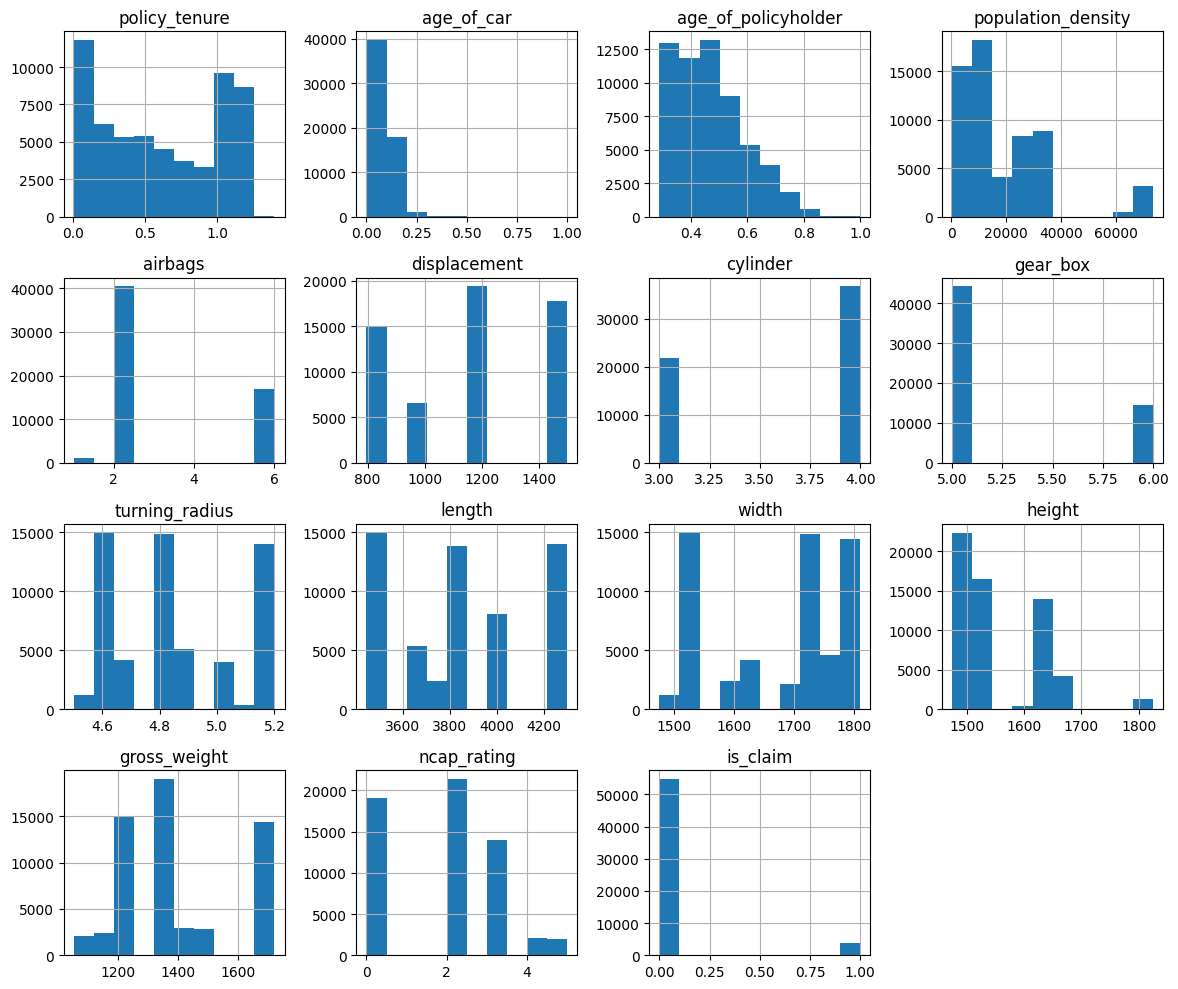

In [30]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

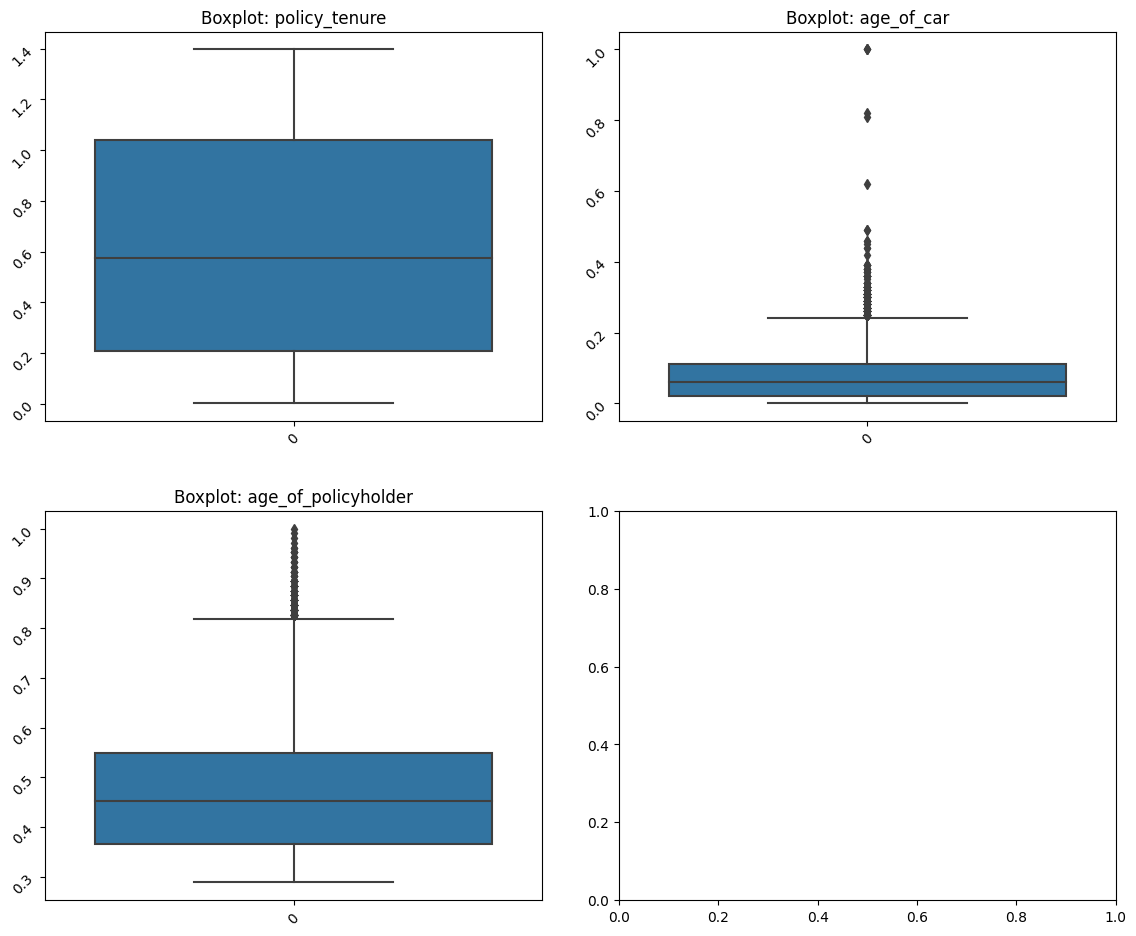

In [106]:
data = ['policy_tenure', 'age_of_car', 'age_of_policyholder']
iterator = 1

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for col, ax in zip(data, axs.flatten()):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Boxplot: {col}')
    ax.tick_params(rotation=45)

plt.tight_layout(pad=3)
plt.show()

Percentage of records per class: 
0    93.603222
1     6.396778
Name: is_claim, dtype: float64


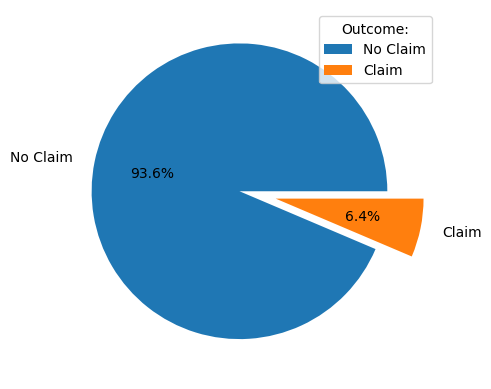

In [69]:
percentage_per_class = df['is_claim'].value_counts(normalize=True) * 100

print("Percentage of records per class: ")
print(percentage_per_class)

fig = plt.figure(facecolor='white')

ax = fig.add_subplot(1, 1, 1, facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15)

plt.legend(title='Outcome:', loc='upper right')

plt.show()

<ipython-input-73-f1843a325468>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df.corr()


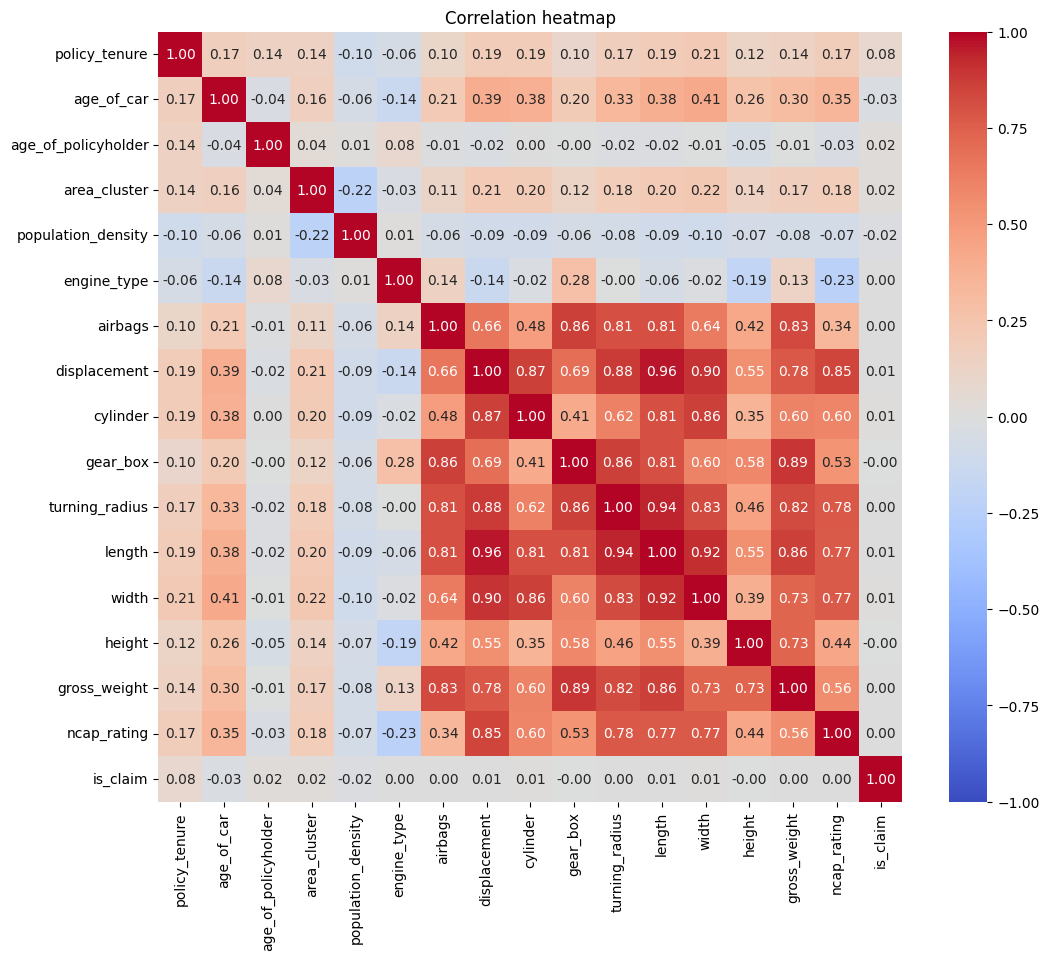

In [73]:
corel = df.corr()

# Kreiranje heatmap-a
plt.figure(figsize=(12, 10))
sns.heatmap(corel, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()

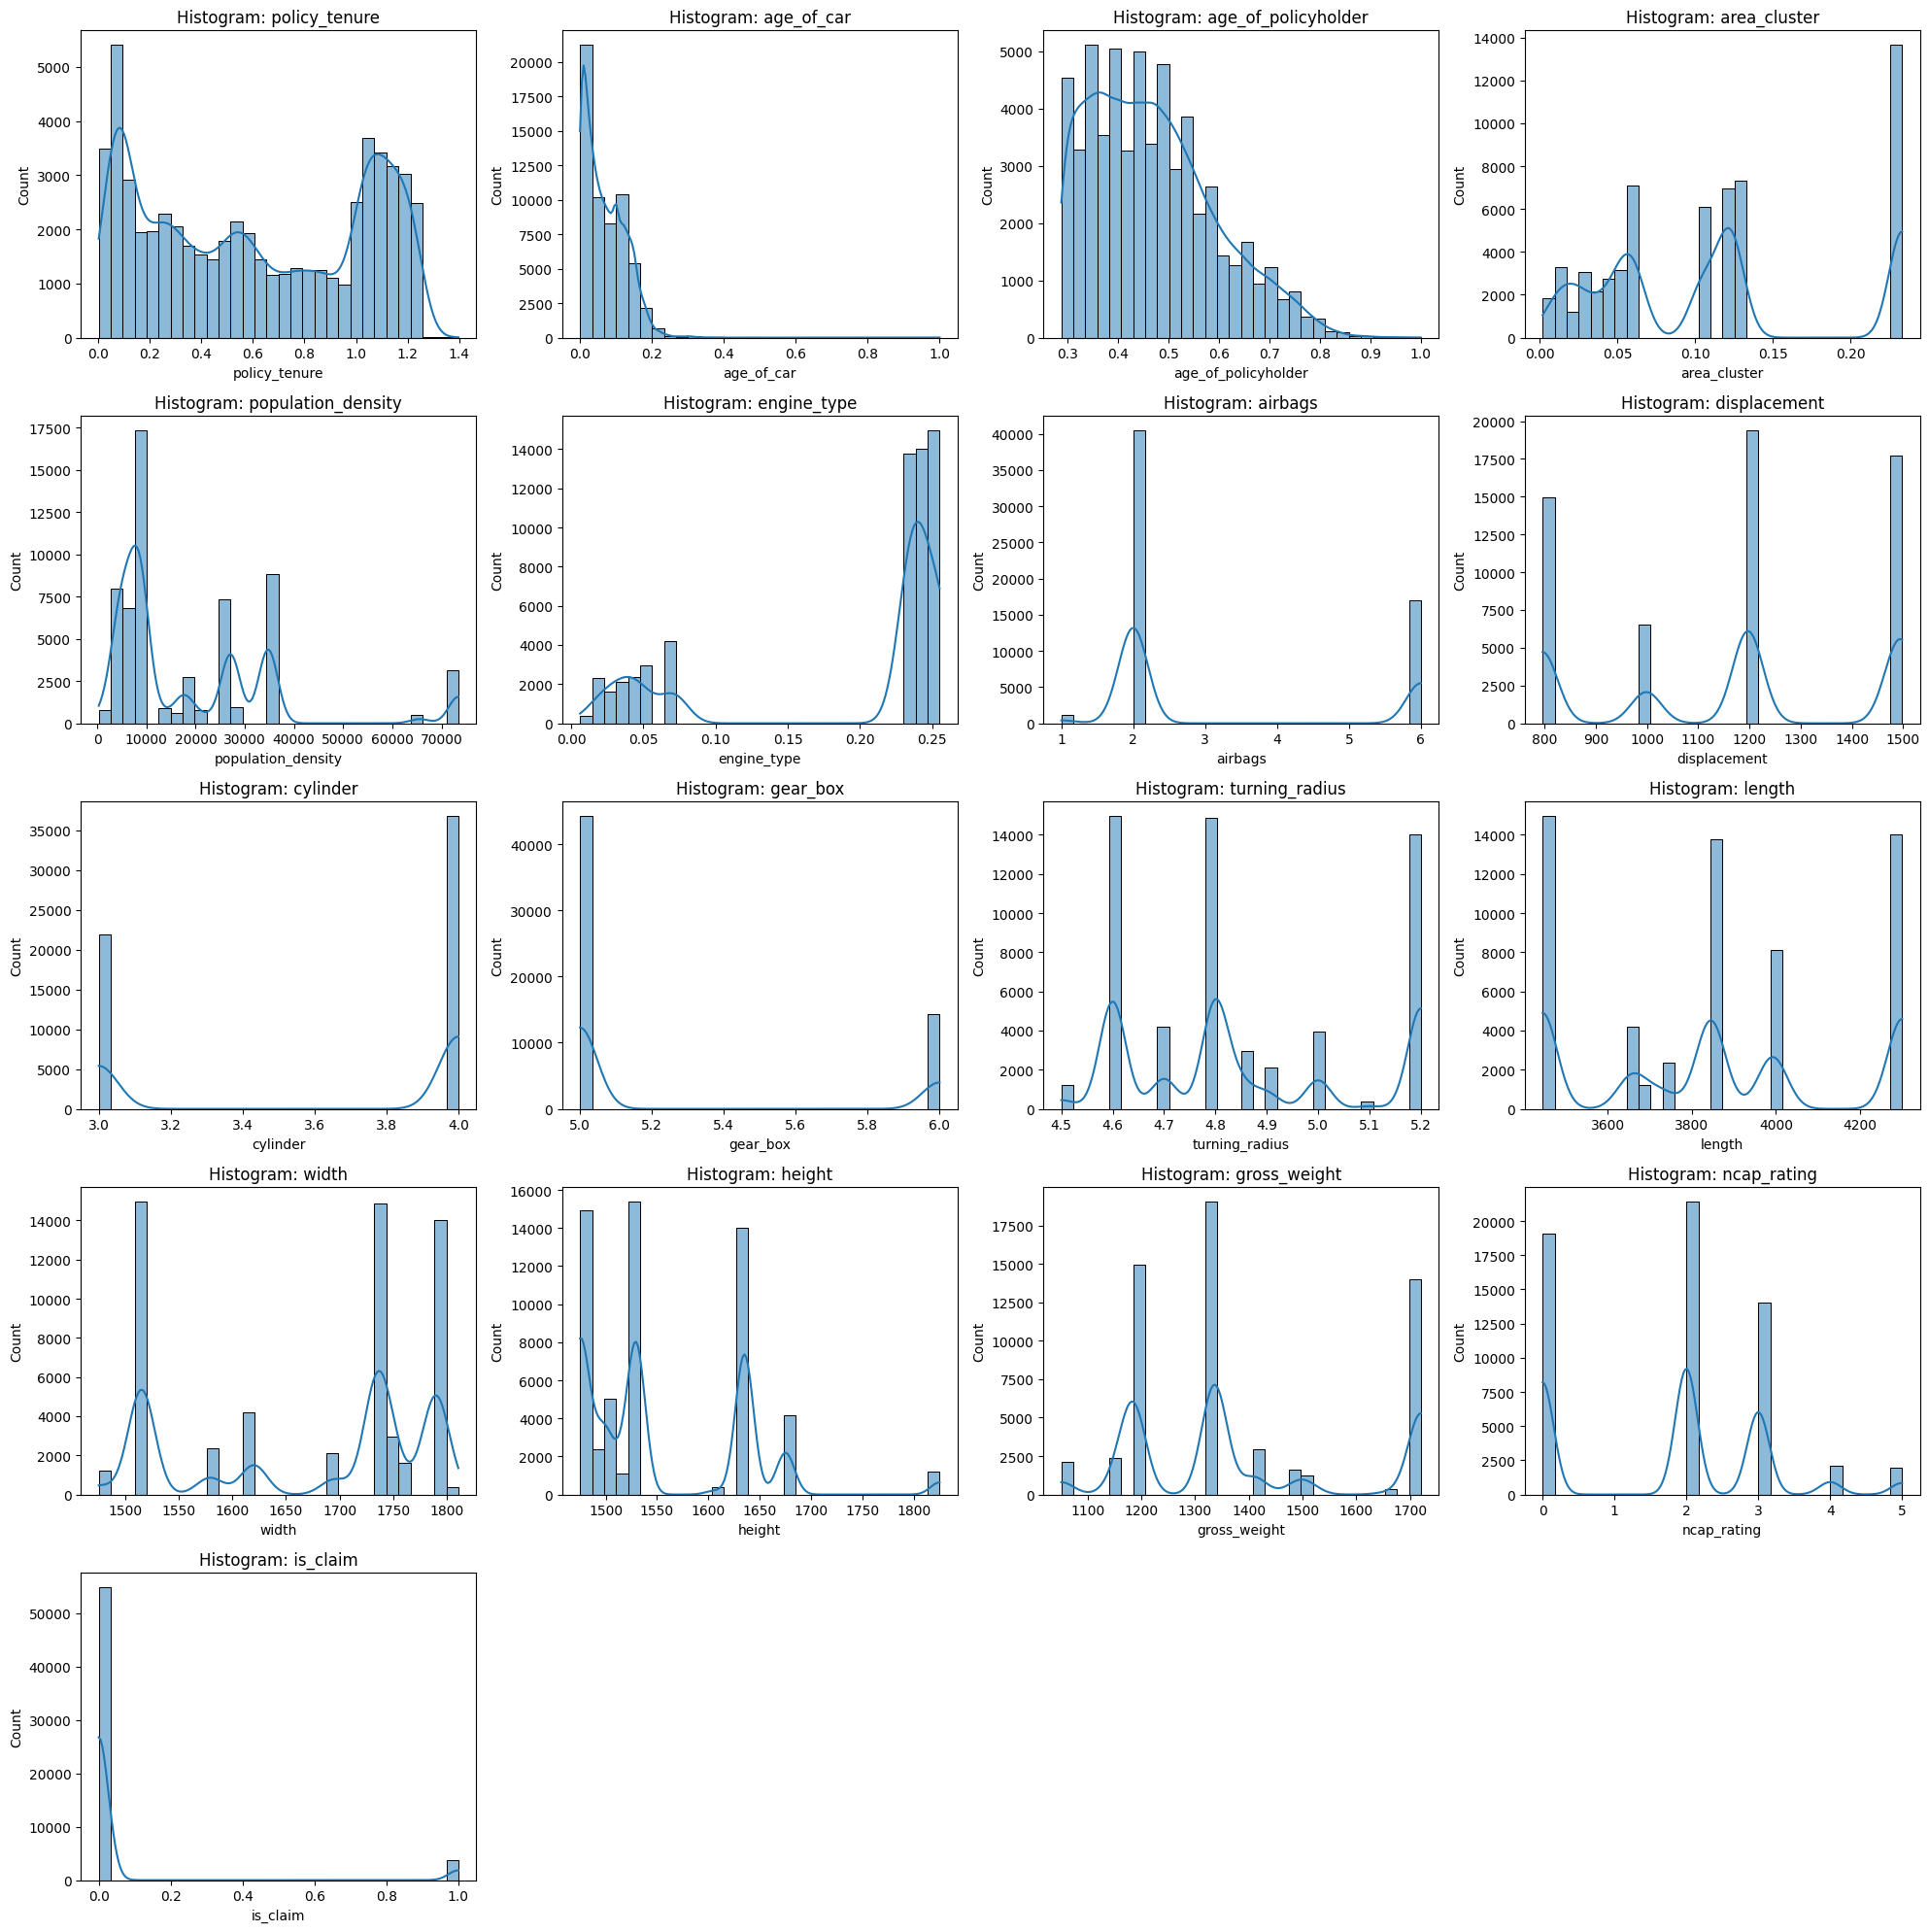

In [88]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Prikazivanje histograma za numerička obeležja
num_features = len(numerical_cols)
num_cols = 4  # Prilagodite broj kolona prema potrebi
num_rows = -(-num_features // num_cols)  # Izračunavanje broja redova na osnovu broja kolona

plt.figure(figsize=(20, 4 * num_rows))  # Povećajte visinu dijagrama
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram: {col}')

plt.tight_layout()
plt.show()